In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Input, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

## Loading data

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## Preprocessing data

In [6]:
X_train, X_test = X_train / 255.0, X_test / 255.0

## Creating model

In [7]:
model = Sequential([
	Input(shape=(32, 32 ,3)),
	Conv2D(32, kernel_size=(3, 3), activation='relu'),
	MaxPooling2D(),
	Conv2D(64, kernel_size=(3, 3), activation='relu'),
	MaxPooling2D(),
	Conv2D(128, kernel_size=(3, 3), activation='relu'),
	MaxPooling2D(),
	Flatten(),
	Dense(64, activation='relu'),
	Dense(10, activation='softmax')
])

## Training the model

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5551 - accuracy: 0.4289 - val_loss: 1.2761 - val_accuracy: 0.5414
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1859 - accuracy: 0.5803 - val_loss: 1.1398 - val_accuracy: 0.6001
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0144 - accuracy: 0.6443 - val_loss: 1.0186 - val_accuracy: 0.6464
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9065 - accuracy: 0.6835 - val_loss: 0.9499 - val_accuracy: 0.6651
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8251 - accuracy: 0.7102 - val_loss: 0.8990 - val_accuracy: 0.6918
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7590 - accuracy: 0.7341 - val_loss: 0.8932 - val_accuracy: 0.6888
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7004 - accuracy: 0.7554 - val_loss: 0.8881 - v

In [37]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9475 - accuracy: 0.7005


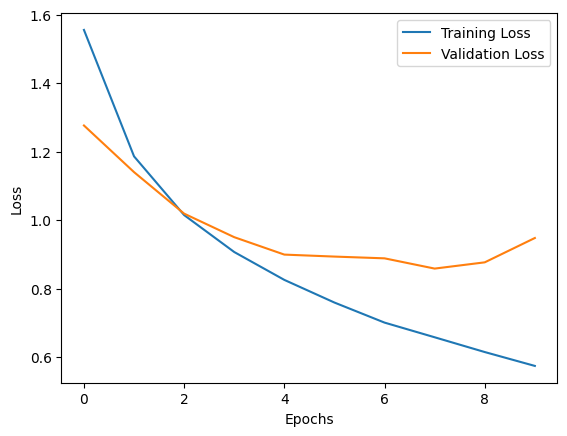

In [38]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

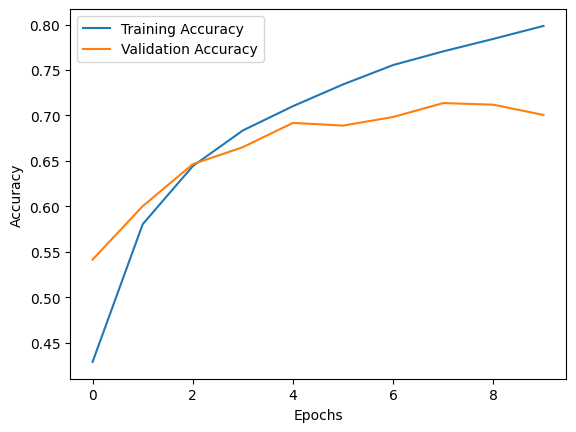

In [39]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()